# Financial Fraud in Canada: Insights and Prevention Strategies (2021–2025)
**Source:**
This is official Canadian government data from the Canadian Anti-Fraud Centre (CAFC), covering Jan 2021 to Mar 2025. Link: https://open.canada.ca/data/en/dataset/6a09c998-cddb-4a22-beff-4dca67ab892f


## Problem statement:

- How is financial fraud changing over time?

- Which fraud types are most common and costly?

- Who is most affected (demographics, region)?

- What are common fraud patterns?

**Goal:** Help law enforcement, policy makers, and the public understand and prevent fraud.

# Data Cleaning & EDA

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#  Load and Inspect Raw Data
df = pd.read_csv("cafc-open-gouv-database-2021-01-01-to-2025-03-31-extracted-2025-04-01.csv")

In [3]:
# Preview data
print("Initial shape:", df.shape)
df.head()

Initial shape: (328649, 21)


,Numéro d'identification / Number ID,Date Received / Date reçue,Complaint Received Type,Type de plainte reçue,Country,Pays,Province/State,Province/État,Fraud and Cybercrime Thematic Categories,Catégories thématiques sur la fraude et la cybercriminalité,...,Méthode de sollicitation,Gender,Genre,Language of Correspondence,Langue de correspondance,Victim Age Range / Tranche d'âge des victimes,Complaint Type,Type de plainte,Number of Victims / Nombre de victimes,Dollar Loss /pertes financières
0,1,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Saskatchewan,Saskatchewan,Merchandise,Marchandise,...,Autre/inconnu,Not Available,non disponible,Not Available,non disponible,'Not Available / non disponible,Attempt,Tentative,0,$0.00
1,2,2021-01-02,CAFC Website,CAFC site web,Not Specified,Non spécifié,Not Specified,Non spécifié,Merchandise,Marchandise,...,Internet,Not Available,non disponible,Not Available,non disponible,'Not Available / non disponible,Victim,Victime,1,"$1,000.00"
2,3,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Quebec,Québec,Identity Fraud,Fraude à l'identité,...,Autre/inconnu,Male,Homme,French,Français,'40 - 49,Victim,Victime,1,$0.00
3,4,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Saskatchewan,Saskatchewan,Phishing,Hameçonnage,...,Courriel,Male,Homme,English,Anglais,'30 - 39,Victim,Victime,1,$0.00
4,5,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Saskatchewan,Saskatchewan,Merchandise,Marchandise,...,Autre/inconnu,Male,Homme,Not Available,non disponible,'60 - 69,Victim,Victime,1,$222.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328649 entries, 0 to 328648
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count   Dtype 
---  ------                                                       --------------   ----- 
 0   Numéro d'identification / Number ID                          328649 non-null  int64 
 1   Date Received / Date reçue                                   328649 non-null  object
 2   Complaint Received Type                                      328649 non-null  object
 3   Type de plainte reçue                                        328649 non-null  object
 4   Country                                                      328649 non-null  object
 5   Pays                                                         328649 non-null  object
 6   Province/State                                               328649 non-null  object
 7   Province/État                                                328649 non-nu

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
#Remove Duplicate Columns (Keep English only where possible)
df = df.drop(columns=[
    'Type de plainte reçue', 'Pays', 'Province/État',
    'Catégories thématiques sur la fraude et la cybercriminalité',
    'Méthode de sollicitation', 'Genre',
    'Langue de correspondance', 'Type de plainte'
])
df.head()

,Numéro d'identification / Number ID,Date Received / Date reçue,Complaint Received Type,Country,Province/State,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Language of Correspondence,Victim Age Range / Tranche d'âge des victimes,Complaint Type,Number of Victims / Nombre de victimes,Dollar Loss /pertes financières
0,1,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Not Available,Not Available,'Not Available / non disponible,Attempt,0,$0.00
1,2,2021-01-02,CAFC Website,Not Specified,Not Specified,Merchandise,Internet,Not Available,Not Available,'Not Available / non disponible,Victim,1,"$1,000.00"
2,3,2021-01-02,CAFC Website,Canada,Quebec,Identity Fraud,Other/unknown,Male,French,'40 - 49,Victim,1,$0.00
3,4,2021-01-02,CAFC Website,Canada,Saskatchewan,Phishing,Email,Male,English,'30 - 39,Victim,1,$0.00
4,5,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Male,Not Available,'60 - 69,Victim,1,$222.73


In [7]:
# Rename columns for clarity
df = df.rename(columns={
    "Numéro d'identification / Number ID": "ID",
    "Date Received / Date reçue": "Date_Received",
    "Fraud and Cybercrime Thematic Categories": "Fraud_Category",
    "Complaint Received Type": "Complaint_Source",
    "Province/State": "Province",
    "Dollar Loss /pertes financières": "Dollar_Loss",
    "Number of Victims / Nombre de victimes": "Victim_Count",
    "Victim Age Range / Tranche d'âge des victimes": "Victim_Age_Range"
})
df.head()

,ID,Date_Received,Complaint_Source,Country,Province,Fraud_Category,Solicitation Method,Gender,Language of Correspondence,Victim_Age_Range,Complaint Type,Victim_Count,Dollar_Loss
0,1,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Not Available,Not Available,'Not Available / non disponible,Attempt,0,$0.00
1,2,2021-01-02,CAFC Website,Not Specified,Not Specified,Merchandise,Internet,Not Available,Not Available,'Not Available / non disponible,Victim,1,"$1,000.00"
2,3,2021-01-02,CAFC Website,Canada,Quebec,Identity Fraud,Other/unknown,Male,French,'40 - 49,Victim,1,$0.00
3,4,2021-01-02,CAFC Website,Canada,Saskatchewan,Phishing,Email,Male,English,'30 - 39,Victim,1,$0.00
4,5,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Male,Not Available,'60 - 69,Victim,1,$222.73


In [8]:
# Convert Date and Dollar_Loss to correct format
df['Date_Received'] = pd.to_datetime(df['Date_Received'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328649 entries, 0 to 328648
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ID                          328649 non-null  int64         
 1   Date_Received               328649 non-null  datetime64[ns]
 2   Complaint_Source            328649 non-null  object        
 3   Country                     328649 non-null  object        
 4   Province                    328649 non-null  object        
 5   Fraud_Category              328649 non-null  object        
 6   Solicitation Method         328649 non-null  object        
 7   Gender                      328649 non-null  object        
 8   Language of Correspondence  328649 non-null  object        
 9   Victim_Age_Range            328649 non-null  object        
 10  Complaint Type              328649 non-null  object        
 11  Victim_Count                328649 non-

In [9]:
# Step 1: Remove $ and commas, then convert to float
df['Dollar_Loss'] = (df['Dollar_Loss'].astype(str).str.replace('[\$,]', '', regex=True).str.strip())

# Step 2: Convert to numeric
df['Dollar_Loss'] = pd.to_numeric(df['Dollar_Loss'], errors='coerce')

# Step 3: Check if it worked
df['Dollar_Loss'].describe()


,Dollar_Loss
count,3.286490e+05
mean,6.996873e+03
std,1.023280e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.361500e+07


In [10]:
# Handle Missing Values
# Replace 'Not Available' and similar with NaN
df = df.replace(['Not Available', 'non disponible', 'Not Specified', 'Autre/inconnu', "'Not Available / non disponible"], pd.NA)

In [11]:
# Check missing values
missing_summary = df.isna().sum()
missing_summary

,0
ID,0
Date_Received,0
Complaint_Source,0
Country,74367
Province,77767
Fraud_Category,0
Solicitation Method,17387
Gender,84113
Language of Correspondence,84555
Victim_Age_Range,98111


In [12]:
missing_summary = df.isna().sum().sort_values(ascending=False)
print("\nMissing values summary:\n", missing_summary[missing_summary > 0])


Missing values summary:
 Victim_Age_Range              98111
Language of Correspondence    84555
Gender                        84113
Province                      77767
Country                       74367
Solicitation Method           17387
dtype: int64


- We can drop 2 columns Country(we are working with Canadian dataset) and Language of Correspondence not inmportant for our goals.

- Solicitation Method: Only ~6% missing. We can fill with "Unknown" safely.

- Victim_Age_Range / Gender: We will keep — useful for demographic trends, even with missing values.

In [13]:
# Drop 'Language of Correspondence' and 'Country'
df.drop(['Language of Correspondence', 'Country'], axis=1, inplace=True)
df.head()

,ID,Date_Received,Complaint_Source,Province,Fraud_Category,Solicitation Method,Gender,Victim_Age_Range,Complaint Type,Victim_Count,Dollar_Loss
0,1,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Other/unknown,<NA>,<NA>,Attempt,0,0.00
1,2,2021-01-02,CAFC Website,<NA>,Merchandise,Internet,<NA>,<NA>,Victim,1,1000.00
2,3,2021-01-02,CAFC Website,Quebec,Identity Fraud,Other/unknown,Male,'40 - 49,Victim,1,0.00
3,4,2021-01-02,CAFC Website,Saskatchewan,Phishing,Email,Male,'30 - 39,Victim,1,0.00
4,5,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Other/unknown,Male,'60 - 69,Victim,1,222.73


In [14]:
#  Clean and standardize Province and Solicitation Method columns
# Strip whitespace and convert to uppercase
df['Province'] = df['Province'].str.strip()

# Replace invalid or missing province entries
df['Province'] = df['Province'].fillna('UNKNOWN')
df['Solicitation Method'] = df['Solicitation Method'].fillna('Unknown')
print(df['Province'].value_counts())
print(df['Solicitation Method'].value_counts())

Province
Ontario                     96150
UNKNOWN                     77767
Quebec                      67041
British Columbia            31604
Alberta                     26189
                            ...  
Rhode Island                    3
North Dakota                    3
South Dakota                    2
Puerto Rico                     2
Northern Mariana Islands        1
Name: count, Length: 67, dtype: int64
Solicitation Method
Other/unknown              95692
Direct call                77299
Email                      37102
Internet-social network    36537
Internet                   31204
Text message               26140
Unknown                    17387
Door to door/in person      3916
Mail                        2951
Fax                          167
Video Call                   119
Television                    71
Print                         57
Radio                          7
Name: count, dtype: int64


In [15]:
# Lets Keep only valid Canadian provinces and territories
canadian_provinces = [
    'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland And Labrador',
    'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan',
    'Northwest Territories', 'Nunavut', 'Yukon'
]

# Set non-Canadian or missing provinces as 'Unknown'
df['Province'] = df['Province'].where(df['Province'].isin(canadian_provinces), 'Unknown')
df['Province'].value_counts()

,count
Province,
Ontario,96150
Unknown,79852
Quebec,67041
British Columbia,31604
Alberta,26189
Manitoba,9014
Saskatchewan,5889
Nova Scotia,5334
New Brunswick,4408


In [16]:
###  Clean Solicitation Method column

# Standardize casing and fix inconsistent labels
df['Solicitation Method'] = df['Solicitation Method'].str.strip().str.title()
df['Solicitation Method'] = df['Solicitation Method'].replace({
    'Other/Unknown': 'Unknown',
    'Unknown': 'Unknown'
})

# Optional: Group rare methods into 'Other'
sol_counts = df['Solicitation Method'].value_counts()
rare_methods = sol_counts[sol_counts < 500].index
df['Solicitation Method'] = df['Solicitation Method'].replace(rare_methods, 'Other')

In [17]:
df['Victim_Age_Range'].value_counts()

,count
Victim_Age_Range,
'30 - 39,43124
'60 - 69,37931
'40 - 49,37604
'20 - 29,34941
'50 - 59,34525
'70 - 79,23491
'10 - 19,10071
'80 - 89,7454
'90 - 99,979


In [21]:
# Clean Victim_Age_Range
df['Victim_Age_Range'] = df['Victim_Age_Range'].str.strip("'")  # remove leading apostrophe

# Replace non-age values with NaN
invalid_age_values = ['Business / Entreprise', 'Deceased / Décédé']
df['Victim_Age_Range'] = df['Victim_Age_Range'].replace(invalid_age_values, np.nan)

# Optional: Set ordered categories for plotting
age_order = [
    '1 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49',
    '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '100 +'
]
df['Victim_Age_Range'] = pd.Categorical(df['Victim_Age_Range'], categories=age_order, ordered=True)
df['Victim_Age_Range'].value_counts()

,count
Victim_Age_Range,
30 - 39,43124
60 - 69,37931
40 - 49,37604
20 - 29,34941
50 - 59,34525
70 - 79,23491
10 - 19,10071
80 - 89,7454
90 - 99,979


In [22]:
#  Save Cleaned Dataset
cleaned_path = "/content/cleaned_fraud_data.csv"
df.to_csv(cleaned_path, index=False)
print(f"Cleaned data saved to: {cleaned_path}")

Cleaned data saved to: /content/cleaned_fraud_data.csv


In [23]:
df_cleaned = pd.read_csv('cleaned_fraud_data.csv')
df_cleaned.head(30)

,ID,Date_Received,Complaint_Source,Province,Fraud_Category,Solicitation Method,Gender,Victim_Age_Range,Complaint Type,Victim_Count,Dollar_Loss
0,1,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Unknown,NaN,NaN,Attempt,0,0.00
1,2,2021-01-02,CAFC Website,Unknown,Merchandise,Internet,NaN,NaN,Victim,1,1000.00
2,3,2021-01-02,CAFC Website,Quebec,Identity Fraud,Unknown,Male,40 - 49,Victim,1,0.00
3,4,2021-01-02,CAFC Website,Saskatchewan,Phishing,Email,Male,30 - 39,Victim,1,0.00
4,5,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Unknown,Male,60 - 69,Victim,1,222.73
5,6,2021-01-02,CAFC Website,Ontario,Phishing,Text Message,Male,30 - 39,Attempt,0,0.00
6,7,2021-01-02,CAFC Website,British Columbia,Identity Fraud,Unknown,Female,70 - 79,Victim,1,0.00
7,8,2021-01-02,CAFC Website,British Columbia,Vendor Fraud,Text Message,Male,10 - 19,Victim,1,300.00
8,9,2021-01-02,CAFC Website,Unknown,Other,Internet,Male,NaN,Other,0,0.00
9,10,2021-01-02,CAFC Website,Quebec,Phishing,Text Message,Female,40 - 49,Victim,1,0.00


# EDA

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328649 entries, 0 to 328648
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   328649 non-null  int64  
 1   Date_Received        328649 non-null  object 
 2   Complaint_Source     328649 non-null  object 
 3   Province             328649 non-null  object 
 4   Fraud_Category       328649 non-null  object 
 5   Solicitation Method  328649 non-null  object 
 6   Gender               244536 non-null  object 
 7   Victim_Age_Range     230341 non-null  object 
 8   Complaint Type       328649 non-null  object 
 9   Victim_Count         328649 non-null  int64  
 10  Dollar_Loss          328649 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 27.6+ MB


In [25]:
# Convert Date and Dollar_Loss to correct format in df_cleaned
df_cleaned['Date_Received'] = pd.to_datetime(df_cleaned['Date_Received'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328649 entries, 0 to 328648
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   328649 non-null  int64         
 1   Date_Received        328649 non-null  datetime64[ns]
 2   Complaint_Source     328649 non-null  object        
 3   Province             328649 non-null  object        
 4   Fraud_Category       328649 non-null  object        
 5   Solicitation Method  328649 non-null  object        
 6   Gender               244536 non-null  object        
 7   Victim_Age_Range     230341 non-null  category      
 8   Complaint Type       328649 non-null  object        
 9   Victim_Count         328649 non-null  int64         
 10  Dollar_Loss          328649 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 25.4+ MB


In [26]:
df_cleaned.duplicated().sum()

np.int64(0)

In [27]:
df_cleaned.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,328649.0,NaN,NaN,NaN,164325.0,1.0,82163.0,164325.0,246487.0,328649.0,94872.938647
Date_Received,328649,NaN,NaN,NaN,2022-10-05 17:18:51.486784,2021-01-02 00:00:00,2021-09-28 00:00:00,2022-08-01 00:00:00,2023-09-05 00:00:00,2025-03-28 00:00:00,NaN
Complaint_Source,328649,10,CAFC Website,174178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province,328649,13,Ontario,96150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fraud_Category,328649,39,Identity Fraud,75475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Solicitation Method,328649,9,Unknown,113079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,244536,5,Female,123639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Victim_Age_Range,230341,11,30 - 39,43124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint Type,328649,5,Victim,212984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Victim_Count,328649.0,NaN,NaN,NaN,0.648059,0.0,0.0,1.0,1.0,1.0,0.477576


In [31]:
# Overview of Target Variables
print("\nMost common fraud categories:")
print(df['Fraud_Category'].value_counts().head(10))


Most common fraud categories:
Fraud_Category
Identity Fraud             75475
Extortion                  31444
Phishing                   28433
Personal Info              26847
Service                    25225
Investments                18124
Merchandise                17242
Bank Investigator          14029
Counterfeit Merchandise    13254
Job                        12992
Name: count, dtype: int64


In [32]:
print("\nTop complaint sources:")
print(df['Complaint_Source'].value_counts().head())


Top complaint sources:
Complaint_Source
CAFC Website    174178
Phone           116794
Email            21633
NCFRS            15537
Other              424
Name: count, dtype: int64


## How is Financial Fraud Changing Over Time?

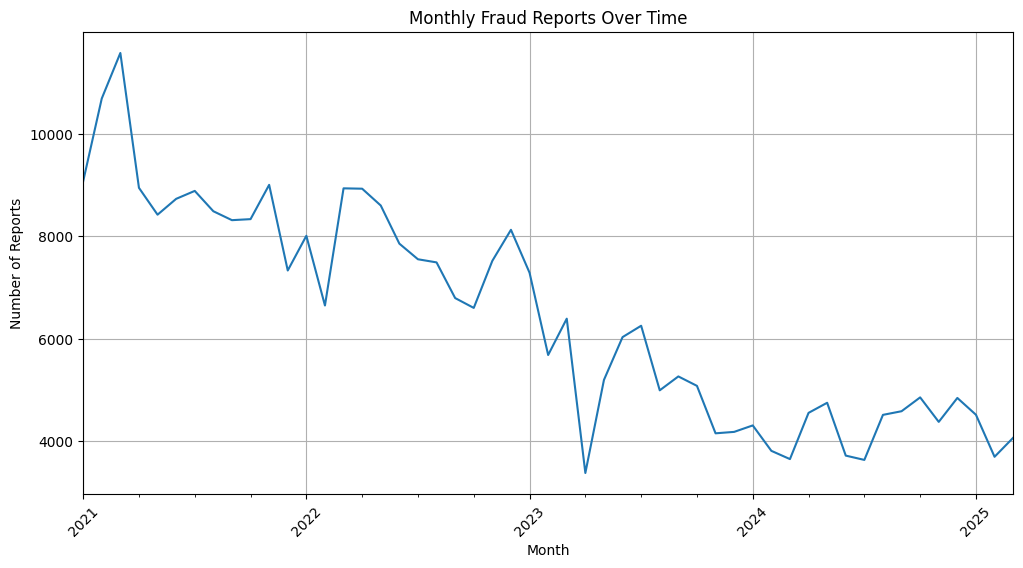

In [33]:
# Group by month and count number of fraud reports
df_cleaned['Month'] = df_cleaned['Date_Received'].dt.to_period('M')
monthly_trend = df_cleaned.groupby('Month').size()

# Plot trend
monthly_trend.plot(figsize=(12,6), title='Monthly Fraud Reports Over Time')
plt.ylabel("Number of Reports")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

 ## Which Fraud Types Are Most Common and Costly?

In [37]:
# Top fraud categories by count
fraud_count = df_cleaned['Fraud_Category'].value_counts().head(10)

# Top fraud categories by total dollar loss
fraud_cost = df_cleaned.groupby('Fraud_Category')['Dollar_Loss'].mean().sort_values(ascending=False).head(10)

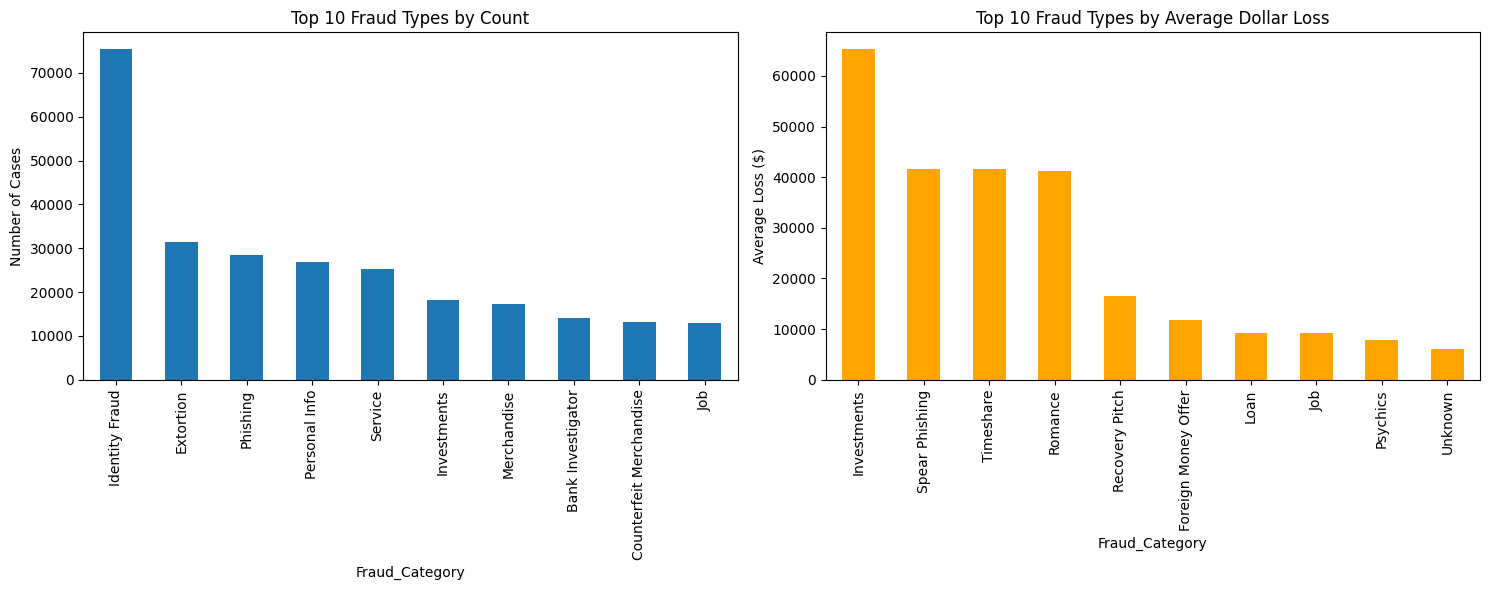

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fraud_count.plot(kind='bar', ax=axs[0], title='Top 10 Fraud Types by Count')
axs[0].set_ylabel("Number of Cases")

fraud_cost.plot(kind='bar', ax=axs[1], title='Top 10 Fraud Types by Average Dollar Loss', color='orange')
axs[1].set_ylabel("Average Loss ($)")

plt.tight_layout()
plt.show()

## Who Is Most Affected? (Demographics)

Victim_Age_Range
1 - 9        161
10 - 19    10071
20 - 29    34941
30 - 39    43124
40 - 49    37604
50 - 59    34525
60 - 69    37931
70 - 79    23491
80 - 89     7454
90 - 99      979
100 +         60
Name: count, dtype: int64


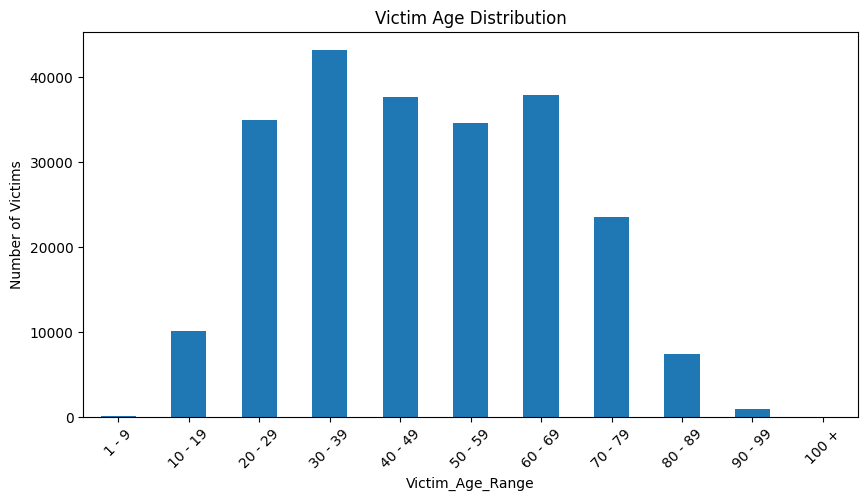

In [42]:
# Convert to categorical with defined order age_order
df_cleaned['Victim_Age_Range'] = pd.Categorical(
    df_cleaned['Victim_Age_Range'],
    categories=age_order,
    ordered=True
)
age_counts = df_cleaned['Victim_Age_Range'].value_counts().sort_index()
print(age_counts)
age_counts.plot(kind='bar', figsize=(10,5), title='Victim Age Distribution')
plt.ylabel("Number of Victims")
plt.xticks(rotation=45)
plt.show()

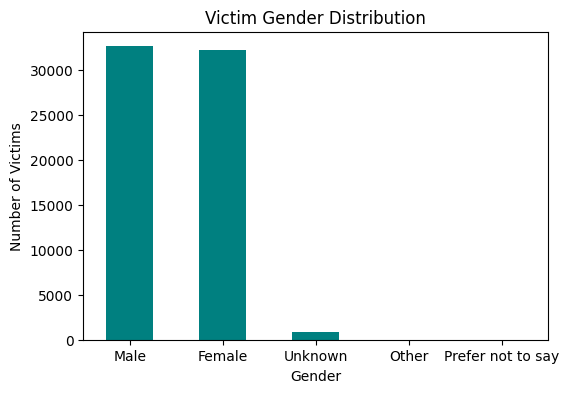

In [ ]:
# Gender distribution
gender_counts = df_cleaned['Gender'].value_counts()
gender_counts.plot(kind='bar', figsize=(6,4), title='Victim Gender Distribution', color='teal')
plt.ylabel("Number of Victims")
plt.xticks(rotation=0)
plt.show()

## Regional Distribution of Fraud in Canada

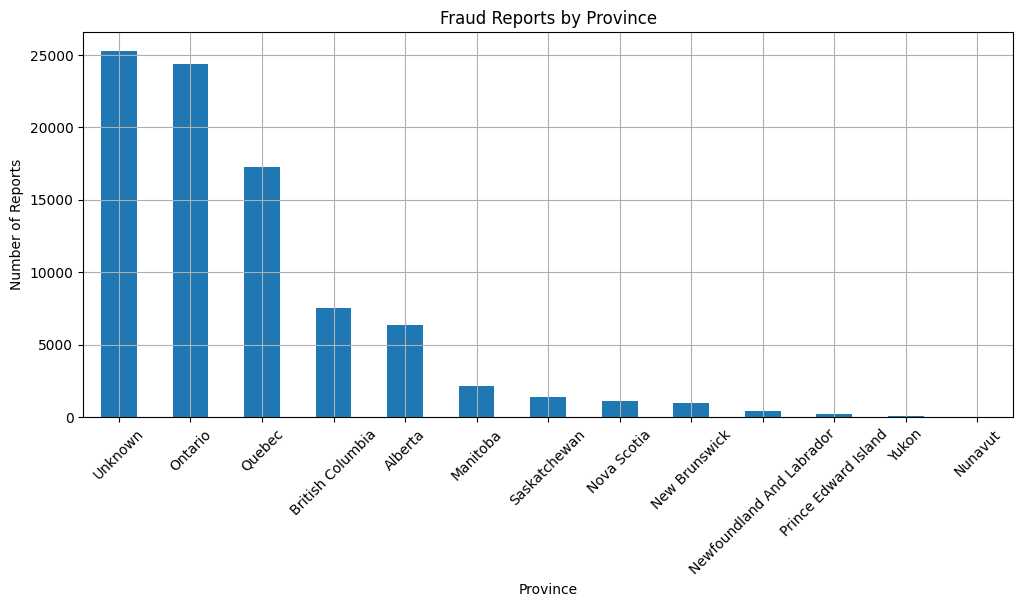

In [ ]:
province_counts = df_cleaned['Province'].value_counts()
province_counts.plot(kind='bar', figsize=(12,5), title='Fraud Reports by Province')
plt.ylabel("Number of Reports")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# What Are Common Fraud Patterns? (Solicitation Method)


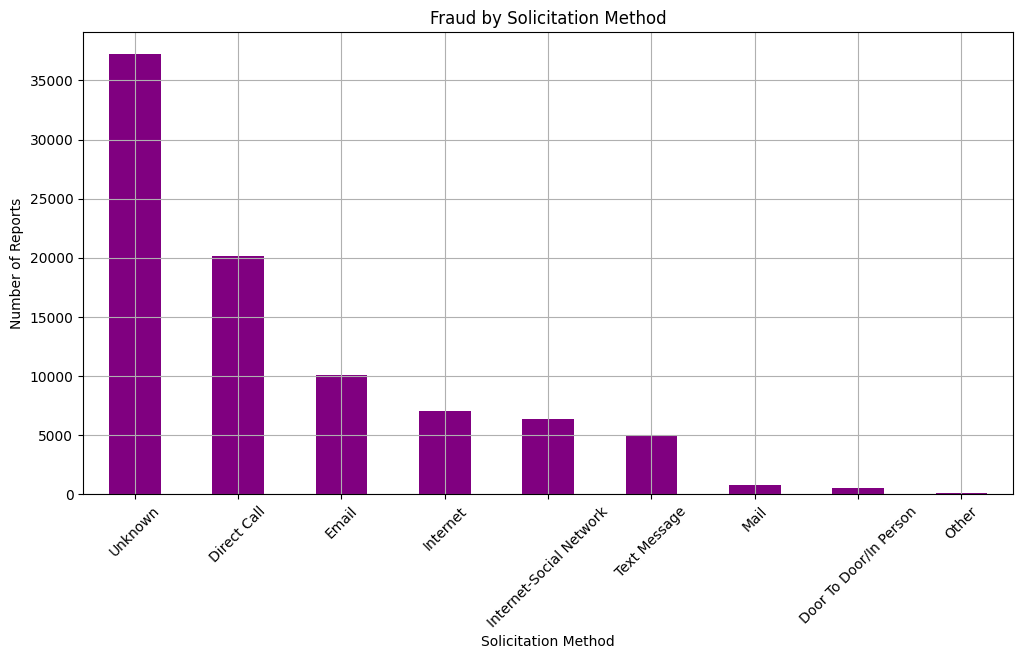

In [ ]:
sol_method_counts = df_cleaned['Solicitation Method'].value_counts()
sol_method_counts.plot(kind='bar', figsize=(12,6), title='Fraud by Solicitation Method', color='purple')
plt.ylabel("Number of Reports")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

 Total and Average Dollar Loss by Method

In [43]:
# Total dollar loss
loss_by_method = df_cleaned.groupby('Solicitation Method')['Dollar_Loss'].sum().sort_values(ascending=False)

# Average dollar loss
avg_loss_by_method = df_cleaned.groupby('Solicitation Method')['Dollar_Loss'].mean().sort_values(ascending=False)

print("Total Loss:\n", loss_by_method)
print("\nAverage Loss:\n", avg_loss_by_method)


Total Loss:
 Solicitation Method
Internet-Social Network    7.170425e+08
Internet                   5.959586e+08
Email                      3.048316e+08
Unknown                    2.629967e+08
Direct Call                2.521358e+08
Text Message               9.953252e+07
Door To Door/In Person     5.980595e+07
Other                      5.043889e+06
Mail                       2.167736e+06
Name: Dollar_Loss, dtype: float64

Average Loss:
 Solicitation Method
Internet-Social Network    19625.106190
Internet                   19098.788127
Door To Door/In Person     15272.203853
Other                      11980.733777
Email                       8216.041383
Text Message                3807.670819
Direct Call                 3261.824752
Unknown                     2325.778450
Mail                         734.576801
Name: Dollar_Loss, dtype: float64


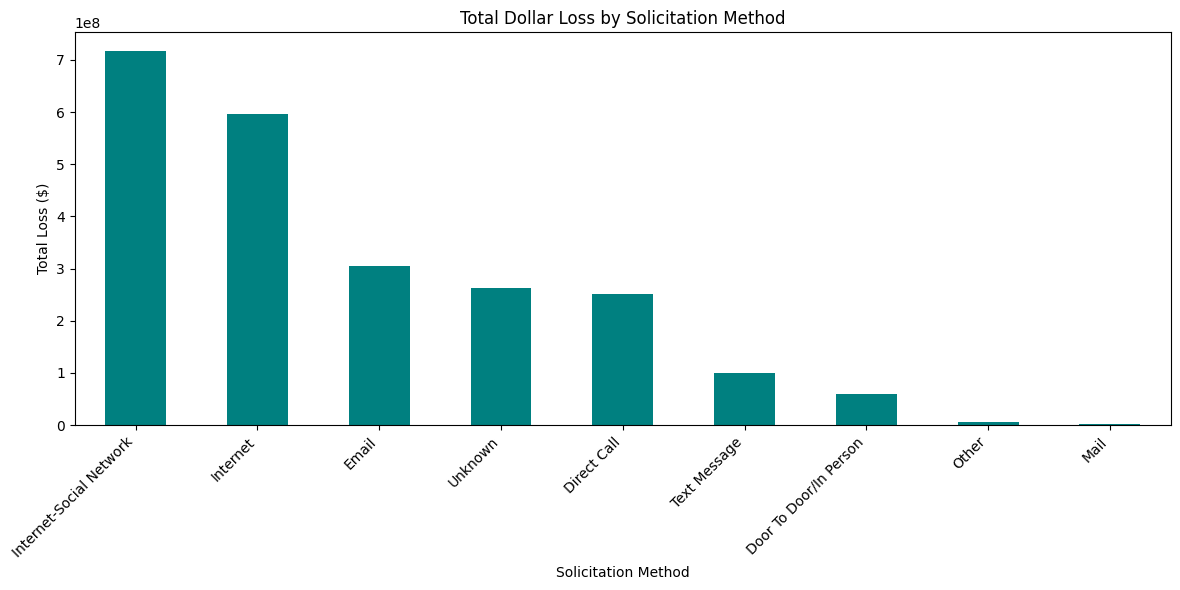

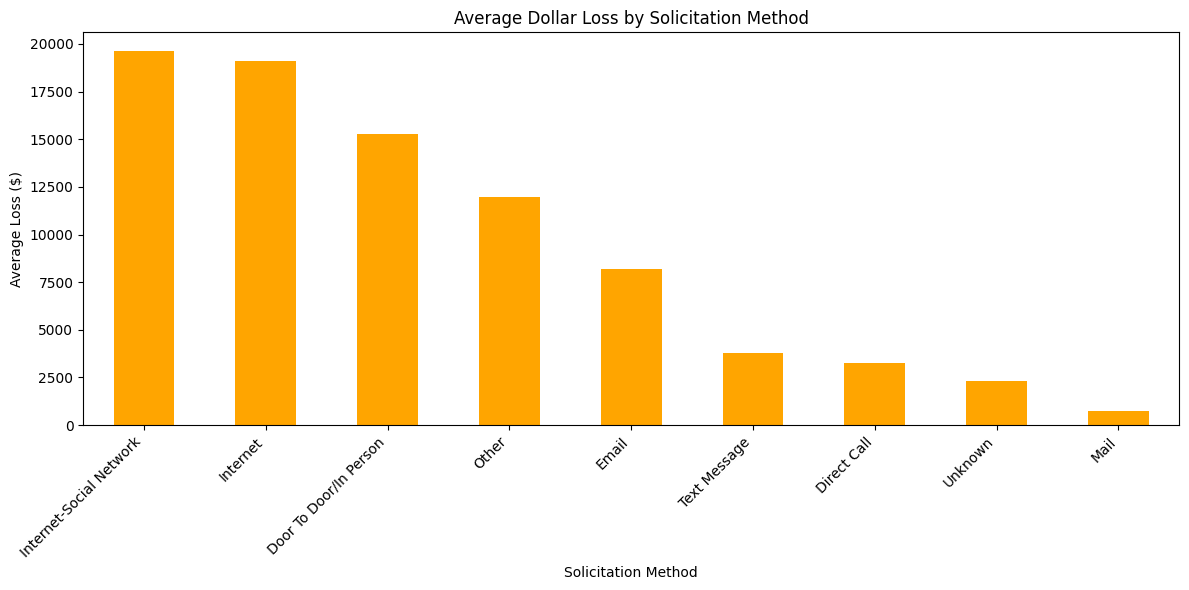

In [45]:
# Total Loss
plt.figure(figsize=(12, 6))
loss_by_method.plot(kind='bar', color='teal')
plt.title('Total Dollar Loss by Solicitation Method')
plt.ylabel('Total Loss ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Loss
plt.figure(figsize=(12, 6))
avg_loss_by_method.plot(kind='bar', color='orange')
plt.title('Average Dollar Loss by Solicitation Method')
plt.ylabel('Average Loss ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights**: The most frequent solicitation method is Direct Call, followed by Email and Internet-based methods. However, Email and Social Media tend to result in higher average dollar losses, suggesting more successful scams. A large portion of records is still classified as Other/unknown, indicating room for improving fraud categorization and reporting.

--------------------------------------------------------------------------------

## Predictive Modeling

### Objective:
Build a binary classification model to predict if a fraud complaint leads to financial loss (`Dollar_Loss > 0`).

### Why this matters:
This model helps identify fraud cases that are more likely to result in financial damage, supporting fraud detection and prevention strategies.

### Steps:
- Create binary target (`Loss`)
- Encode categorical features
- Train/test split
- Train a Logistic Regression and/or Decision Tree model
- Evaluate using accuracy, precision, recall


In [57]:
# Binary target: 1 if Dollar_Loss > 0, else 0
df_cleaned['Loss'] = df_cleaned['Dollar_Loss'].apply(lambda x: 1 if x > 0 else 0)
df_cleaned.head()

,ID,Date_Received,Complaint_Source,Province,Fraud_Category,Solicitation Method,Gender,Victim_Age_Range,Complaint Type,Victim_Count,Dollar_Loss,Month,Loss
0,1,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Unknown,NaN,NaN,Attempt,0,0.00,2021-01,0
1,2,2021-01-02,CAFC Website,Unknown,Merchandise,Internet,NaN,NaN,Victim,1,1000.00,2021-01,1
2,3,2021-01-02,CAFC Website,Quebec,Identity Fraud,Unknown,Male,40 - 49,Victim,1,0.00,2021-01,0
3,4,2021-01-02,CAFC Website,Saskatchewan,Phishing,Email,Male,30 - 39,Victim,1,0.00,2021-01,0
4,5,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Unknown,Male,60 - 69,Victim,1,222.73,2021-01,1


We'll use common predictors like:

- Fraud_Category

- Solicitation Method

- Complaint_Source

- Province

- Gender

- Victim_Age_Range

- Victim_Count

### Preprocessing data. Convert Victim_Count to numeric before splitting your dataset

In [60]:
df_cleaned['Victim_Count'] = pd.to_numeric(df_cleaned['Victim_Count'], errors='coerce')

In [62]:
df_cleaned['Victim_Count'] = df_cleaned['Victim_Count'].fillna(0)
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328649 entries, 0 to 328648
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   328649 non-null  int64         
 1   Date_Received        328649 non-null  datetime64[ns]
 2   Complaint_Source     328649 non-null  object        
 3   Province             328649 non-null  object        
 4   Fraud_Category       328649 non-null  object        
 5   Solicitation Method  328649 non-null  object        
 6   Gender               244536 non-null  object        
 7   Victim_Age_Range     230341 non-null  category      
 8   Complaint Type       328649 non-null  object        
 9   Victim_Count         328649 non-null  int64         
 10  Dollar_Loss          328649 non-null  float64       
 11  Month                328649 non-null  period[M]     
 12  Loss                 328649 non-null  int64         
dtypes: category(1)

,ID,Date_Received,Complaint_Source,Province,Fraud_Category,Solicitation Method,Gender,Victim_Age_Range,Complaint Type,Victim_Count,Dollar_Loss,Month,Loss
0,1,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Unknown,NaN,NaN,Attempt,0,0.00,2021-01,0
1,2,2021-01-02,CAFC Website,Unknown,Merchandise,Internet,NaN,NaN,Victim,1,1000.00,2021-01,1
2,3,2021-01-02,CAFC Website,Quebec,Identity Fraud,Unknown,Male,40 - 49,Victim,1,0.00,2021-01,0
3,4,2021-01-02,CAFC Website,Saskatchewan,Phishing,Email,Male,30 - 39,Victim,1,0.00,2021-01,0
4,5,2021-01-02,CAFC Website,Saskatchewan,Merchandise,Unknown,Male,60 - 69,Victim,1,222.73,2021-01,1


In [73]:
features = ['Fraud_Category', 'Solicitation Method', 'Complaint_Source',
            'Province', 'Gender', 'Victim_Age_Range', 'Victim_Count']
target = 'Loss'

X = df_cleaned[features]
y = df_cleaned[target]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression(Pipeline)

In [75]:
# Fill missing values
df_cleaned['Gender'] = df_cleaned['Gender'].fillna('Unknown')
df_cleaned['Victim_Age_Range'] = df_cleaned['Victim_Age_Range'].astype(str).fillna('Unknown')  # convert to string

# Define features and target
features = ['Complaint_Source', 'Province', 'Fraud_Category',
            'Solicitation Method', 'Gender', 'Victim_Age_Range']
target = 'Loss'

X = df_cleaned[features]
y = df_cleaned[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical data
categorical_features = features
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Build full pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train model
logreg_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92     49790
           1       0.76      0.72      0.74     15940

    accuracy                           0.88     65730
   macro avg       0.84      0.82      0.83     65730
weighted avg       0.88      0.88      0.88     65730



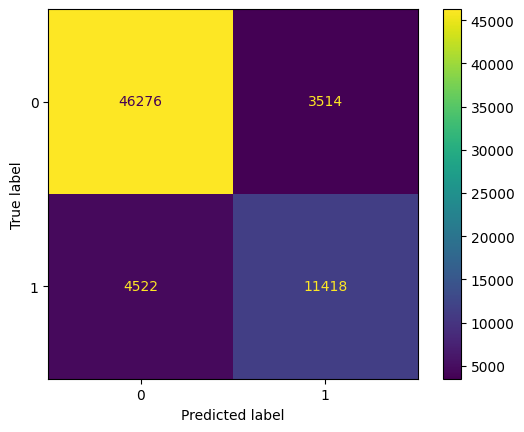

In [76]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_pipeline.classes_)
disp.plot()


## Decision Tree Classifier

📊 Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     49790
           1       0.76      0.73      0.74     15940

    accuracy                           0.88     65730
   macro avg       0.84      0.83      0.83     65730
weighted avg       0.88      0.88      0.88     65730



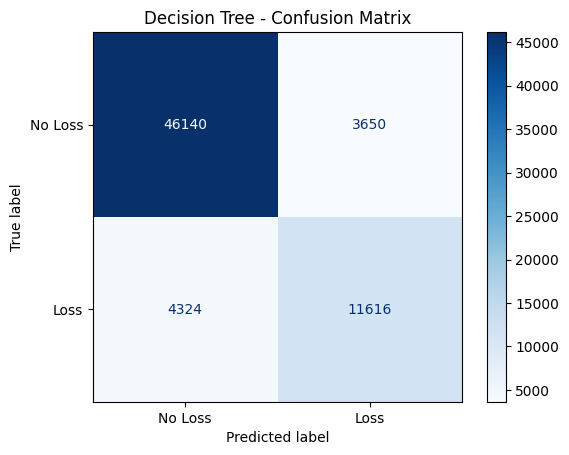

In [77]:
# Decision Tree pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train
dt_pipeline.fit(X_train, y_train)

# Predict
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluate
print("📊 Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Loss', 'Loss'])
disp_dt.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()



Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     49790
           1       0.76      0.75      0.75     15940

    accuracy                           0.88     65730
   macro avg       0.84      0.84      0.84     65730
weighted avg       0.88      0.88      0.88     65730



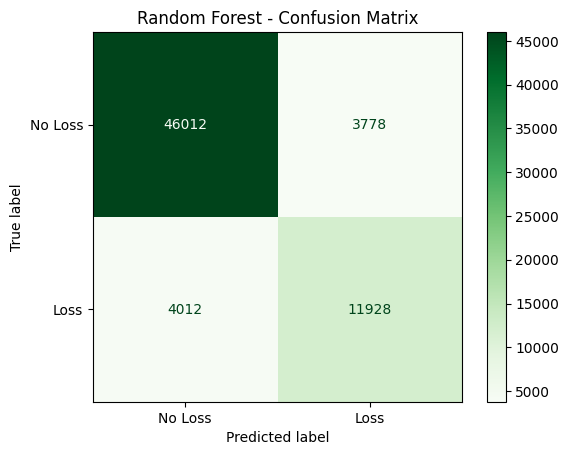

In [78]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Loss', 'Loss'])
disp_rf.plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()